In [406]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


**importing dependencies**

In [407]:
import pandas
import numpy
import matplotlib.pyplot

In [408]:
dev=pandas.read_csv('/kaggle/input/glass/glass.csv')

In [409]:
dev.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [410]:
dev.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [411]:
dev.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**visualing the data**

(array([147.,  17.,  12.,  14.,  12.,   6.,   4.,   1.,   0.,   1.]),
 array([0.   , 0.051, 0.102, 0.153, 0.204, 0.255, 0.306, 0.357, 0.408,
        0.459, 0.51 ]),
 <BarContainer object of 10 artists>)

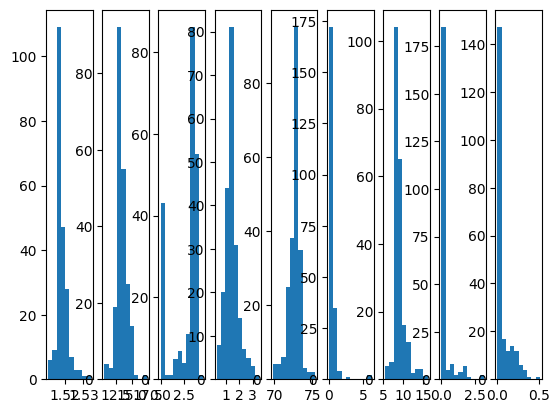

In [412]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)=matplotlib.pyplot.subplots(nrows=1,ncols=9)
ax1.hist(dev['RI'])
ax2.hist(dev['Na'])
ax3.hist(dev['Mg'])
ax4.hist(dev['Al'])
ax5.hist(dev['Si'])
ax6.hist(dev['K'])
ax7.hist(dev['Ca'])
ax8.hist(dev['Ba'])
ax9.hist(dev['Fe'])

**data is nither standardized nor normalize**

In [413]:
dev.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

**finding correlation between type and other columns**

In [414]:
correlation=dev.corr()
correlation['Type'].sort_values(ascending=False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

In [415]:
from sklearn.model_selection import train_test_split

**shuffling the data**

In [416]:
dev.Type

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [417]:
dev=dev.sample(frac=1)

In [418]:
dev.Type

32     1
133    2
139    2
195    7
196    7
      ..
52     1
162    3
46     1
173    5
50     1
Name: Type, Length: 214, dtype: int64

In [419]:
harsh=dev.Type
dev.drop('Type',axis=1,inplace=True)

In [420]:
harsh.nunique()

6

**splitting the data**

In [421]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [422]:
diff_value=len(harsh.value_counts())
guess_performance=100/diff_value
guess_performance

16.666666666666668

model1-RandomForest
model2-SGD Classifier
model3-ANN

In [423]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(xtrain,ytrain)

RandomForestClassifier()

In [424]:
m1=model1.score(xtest,ytest)

In [425]:
m1

0.7441860465116279

In [426]:
from sklearn.linear_model import SGDClassifier
model2=SGDClassifier()
model2.fit(xtrain,ytrain)

SGDClassifier()

In [427]:
m2=model2.score(xtest,ytest)

In [428]:
m2

0.37209302325581395

In [429]:
import tensorflow

In [430]:
harsh=tensorflow.keras.utils.to_categorical(harsh,num_classes=8)

In [431]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [432]:
model3=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(107,activation='sigmoid'),
    tensorflow.keras.layers.Dense(128,activation='sigmoid'),
    tensorflow.keras.layers.Dense(8,activation='softmax')
    
])

In [433]:
model3.compile(optimizer=tensorflow.keras.optimizers.SGD(),
              loss=tensorflow.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [434]:
m3=model3.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1255 - loss: 1.9793 - val_accuracy: 0.2093 - val_loss: 1.9217
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3957 - loss: 1.6959 - val_accuracy: 0.2093 - val_loss: 1.8528
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3643 - loss: 1.6835 - val_accuracy: 0.3953 - val_loss: 1.8218
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4150 - loss: 1.5829 - val_accuracy: 0.2093 - val_loss: 1.8126
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3390 - loss: 1.5405 - val_accuracy: 0.2093 - val_loss: 1.8035
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3265 - loss: 1.5962 - val_accuracy: 0.2093 - val_loss: 1.8050
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2974 - loss: 1.5584 - val_accuracy: 0.2093 - val_loss: 1.7931
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3406 - loss: 1.5333 - val_accuracy: 0.2093 - val_loss: 1.7974
Epoch 9

In [435]:
m3=model3.evaluate(xtest,ytest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3471 - loss: 1.8139 


In [436]:
m3[1]

0.3488371968269348

**need to standardise the data**

In [437]:
dev=pandas.read_csv('/kaggle/input/glass/glass.csv')

In [438]:
harsh=dev.Type
dev.drop('Type',axis=1,inplace=True)

**standardization**

In [439]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dev = scaler.fit_transform(dev)

In [440]:
dev[0].mean()

-0.1293182216874334

In [441]:
dev[0].std()

0.7421723261636061

In [442]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [443]:
model1.fit(xtrain,ytrain)
m11=model1.score(xtest,ytest)

In [444]:
m11

0.7906976744186046

In [445]:
model2.fit(xtrain,ytrain)
m22=model2.score(xtest,ytest)

In [446]:
m22

0.5581395348837209

In [447]:
classes=harsh.nunique()
harsh=tensorflow.keras.utils.to_categorical(harsh,num_classes=classes+2)

In [448]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [449]:
model3.fit(xtrain,ytrain,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3727 - loss: 1.5311 - val_accuracy: 0.2326 - val_loss: 1.7009
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4302 - loss: 1.4480 - val_accuracy: 0.2326 - val_loss: 1.6781
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3242 - loss: 1.5349 - val_accuracy: 0.2326 - val_loss: 1.6857
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4244 - loss: 1.4613 - val_accuracy: 0.2326 - val_loss: 1.6896
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3572 - loss: 1.5850 - val_accuracy: 0.2326 - val_loss: 1.6896
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4016 - loss: 1.4911 - val_accuracy: 0.2326 - val_loss: 1.6885
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3857 - loss: 1.4479 - val_accuracy: 0.2326 - val_loss: 1.6899
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3873 - loss: 1.5288 - val_accuracy: 0.2326 - val_loss: 1.7033
Epoch 9

In [450]:
m33=model3.evaluate(xtest,ytest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2488 - loss: 1.6639 


**training the model by removing the unnecessary columns**

In [451]:
correlation['Type'].sort_values(ascending=False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

In [452]:
dev=pandas.read_csv('/kaggle/input/glass/glass.csv')

In [453]:
dev.drop('Si',axis=1,inplace=True)
dev.drop('Ca',axis=1,inplace=True)
dev.drop('K',axis=1,inplace=True)
dev.drop('RI',axis=1,inplace=True)
dev.drop('Fe',axis=1,inplace=True)

In [454]:
dev

,Na,Mg,Al,Ba,Type
0,13.64,4.49,1.10,0.00,1
1,13.89,3.60,1.36,0.00,1
2,13.53,3.55,1.54,0.00,1
3,13.21,3.69,1.29,0.00,1
4,13.27,3.62,1.24,0.00,1
...,...,...,...,...,...
209,14.14,0.00,2.88,1.06,7
210,14.92,0.00,1.99,1.59,7
211,14.36,0.00,2.02,1.64,7
212,14.38,0.00,1.94,1.57,7


In [455]:
harsh=dev.Type
dev.drop('Type',axis=1,inplace=True)

In [456]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [457]:
model1.fit(xtrain,ytrain)
m111=model1.score(xtest,ytest)

In [458]:
model2.fit(xtrain,ytrain)
m222=model2.score(xtest,ytest)

**normalizing the data**

In [459]:
dev=pandas.read_csv('/kaggle/input/glass/glass.csv')

In [460]:
harsh=dev.Type
dev.drop('Type',axis=1,inplace=True)

In [461]:
for i in dev.columns:
    dev[i]=dev[i]/dev[i].max()

(array([147.,  17.,  12.,  14.,  12.,   6.,   4.,   1.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

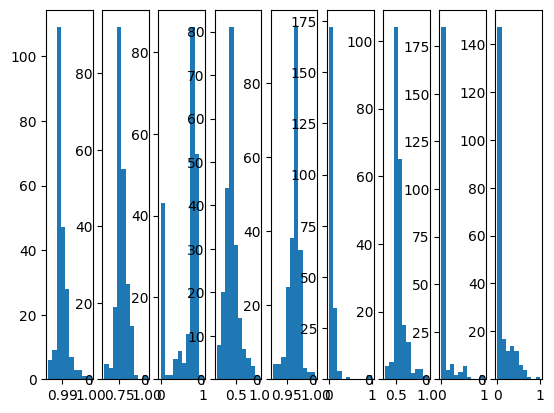

In [462]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9)=matplotlib.pyplot.subplots(nrows=1,ncols=9)
ax1.hist(dev['RI'])
ax2.hist(dev['Na'])
ax3.hist(dev['Mg'])
ax4.hist(dev['Al'])
ax5.hist(dev['Si'])
ax6.hist(dev['K'])
ax7.hist(dev['Ca'])
ax8.hist(dev['Ba'])
ax9.hist(dev['Fe'])

In [463]:
dev

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.991577,0.784810,1.000000,0.314286,0.951863,0.009662,0.540457,0.000000,0.0
1,0.989361,0.799194,0.801782,0.388571,0.964461,0.077295,0.483632,0.000000,0.0
2,0.988428,0.778481,0.790646,0.440000,0.967909,0.062802,0.480544,0.000000,0.0
3,0.989393,0.760069,0.821826,0.368571,0.962870,0.091787,0.507721,0.000000,0.0
4,0.989237,0.763521,0.806236,0.354286,0.969102,0.088567,0.498456,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.988461,0.813579,0.000000,0.822857,0.962870,0.012882,0.567017,0.336508,0.0
210,0.988865,0.858458,0.000000,0.568571,0.968837,0.000000,0.518839,0.504762,0.0
211,0.991342,0.826237,0.000000,0.577143,0.973611,0.000000,0.521309,0.520635,0.0
212,0.988644,0.827388,0.000000,0.554286,0.976130,0.000000,0.523780,0.498413,0.0


In [464]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

In [465]:
model1.fit(xtrain,ytrain)
m1111=model1.score(xtest,ytest)

In [466]:
model2.fit(xtrain,ytrain)
m2222=model2.score(xtest,ytest)

In [467]:
ll={'normal model withhoout anything':[m1,m2,m3[1]],
    'after standardization':[m11,m22,m33[1]],
   'after dropping axes':[m111,m222,None],
   'after Normalization':[m1111,m2222,None]}

In [468]:
final=pandas.DataFrame(ll)

In [469]:
final

,normal model withhoout anything,after standardization,after dropping axes,after Normalization
0,0.744186,0.790698,0.790698,0.744186
1,0.372093,0.558140,0.558140,0.441860
2,0.348837,0.232558,NaN,NaN


**after standardization randomforest performs the best we will tune random forest in after standardization** 

In [470]:
dev=pandas.read_csv('/kaggle/input/glass/glass.csv')

In [471]:
harsh=dev.Type
dev.drop('Type',axis=1,inplace=True)

In [472]:
scaler = StandardScaler()
dev = scaler.fit_transform(dev)

In [474]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

**hyperparmeter tuning**

In [475]:
from sklearn.model_selection import RandomizedSearchCV
     

grid={'n_estimators':[10,20,30,40,50,60,70,80,90,100],
'max_depth':[1,2,3,4,5,6,7,8,9,10],
'min_samples_split':[2,3,4,5,6,7,8,9,10],
'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
'max_features':['auto','sqrt','log2']}
     

ee=RandomizedSearchCV(estimator=model1,param_distributions=grid,n_iter=100,cv=5,verbose=2)
     

ee.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=40; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=40; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, 

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=log2, min_samples_le

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=60; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=60; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_le

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=3, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_le

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=50; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=6, max_features=log2, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=80; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=70; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=80; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=10, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_le

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_sample

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=10; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_s

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=50; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=30; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=30; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=70; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_lea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_sampl

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [476]:
ee.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [478]:
final_model=RandomForestClassifier(n_estimators=70,
 min_samples_split=5,
 min_samples_leaf=2,
 max_features='auto',
 max_depth=10)
final_model.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=70)

In [479]:
final_model.score(xtest,ytest)

0.8372093023255814

**final_results accuracy= 83.72%**

In [482]:
 from sklearn.model_selection import cross_val_predict
 y_train_pred = cross_val_predict(final_model,xtrain,ytrain, cv=3)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [486]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(ytrain, y_train_pred)

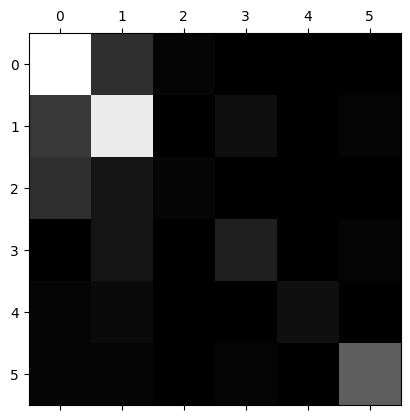

In [488]:
matplotlib.pyplot.matshow(conf_mx, cmap=matplotlib.pyplot.cm.gray)